### **Ejercicios Evaluacion - Unidad III**
- Taller de Programacion
- Autor: Carlos Duran Palape
***

##### **Ejercicio 1**: Programación Orientada a Objetos (POO)

**Clase básica**
- Crea una clase Producto con atributos nombre, precio y stock. Agrega un método mostrar_info().


In [1]:
class Producto:
    def __init__(self, nombre, precio, stock):
        self.nombre = nombre,
        self.precio = precio,
        self.stock = stock

    def mostrar_info(self):
        print(f"{self.nombre} - {self.precio} Stock: {self.stock}.")

**Constructor y método personalizado**
- Agrega un método vender(cantidad) que descuente del stock si hay suficiente.

In [6]:
class Producto:
    def __init__(self, nombre, precio, stock):
        self.nombre = nombre,
        self.precio = precio,
        self.stock = stock

    def mostrar_info(self):
        print(f"{self.nombre} - {self.precio} Stock: {self.stock}.")

    def vender(self, cantidad): #Se agrega el metodo vender
        if cantidad <= self.stock:
            self.stock -= cantidad
            print(f"Venta realizada. Stock restante: {self.stock}")
        else:
            print("Stock insuficiente.")

**Encapsulamiento**

- Modifica la clase Producto para que el atributo stock sea privado. Agrega métodos para consultar y modificar el stock.


In [3]:
class Producto:
    def __init__(self, nombre, precio, stock):
        self.nombre = nombre,
        self.precio = precio,
        self.__stock = stock #atributo privado

    def mostrar_stock(self):
        return self.__stock

**Herencia**
- Crea una clase ProductoDigital que herede de Producto y redefina el método mostrar_info() para incluir “descarga inmediata”.


In [7]:
class ProductoDigital(Producto):
    def mostrar_info(self):
        print(f"{self.nombre} - {self.precio} Descarga inmediata")

**Polimorfismo**
- Crea una lista con objetos Producto y ProductoDigital, recórrela y llama a mostrar_info().

In [8]:
productos = [Producto("Libro", 10000, 5), ProductoDigital("EBook", 5000, 0)]
for p in productos:
    p.mostrar_info()

('Libro',) - (10000,) Stock: 5.
('EBook',) - (5000,) Descarga inmediata


##### **Ejercicio 2**: Análisis de producción mensual

Consigna: Simula la producción mensual (en unidades) de una fábrica durante 12 meses.
- Crea un gráfico de líneas que muestre la evolución.
- Agrega etiquetas, título y cuadrícula.

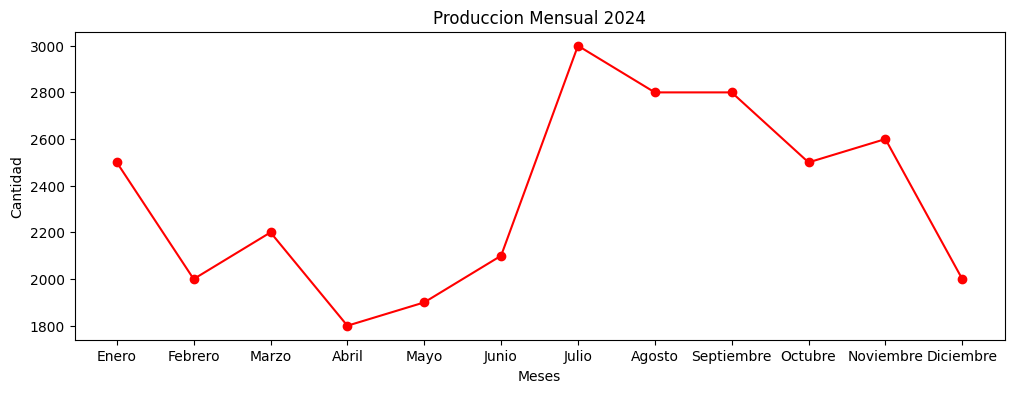

In [9]:
produccion = {
    "Enero": 2500,
    "Febrero": 2000,
    "Marzo": 2200,
    "Abril": 1800,
    "Mayo": 1900,
    "Junio": 2100,
    "Julio": 3000,
    "Agosto": 2800,
    "Septiembre": 2800,
    "Octubre": 2500,
    "Noviembre": 2600,
    "Diciembre": 2000
}

import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(produccion.keys(), produccion.values(), marker="o", color="red")
plt.title("Produccion Mensual 2024")
plt.xlabel("Meses")
plt.ylabel("Cantidad")
plt.show()

##### **Ejercicio 3**: Manejo de Archivos .txt

**Guardar productos en archivo**
- Crea una función que reciba una lista de productos (nombre, precio, stock) y los guarde en un archivo .txt.

In [10]:
def guardar_productos(lista, archivo):
    with open(archivo, 'w') as f:
        for nombre, precio, stock in lista:
            f.write(f"{nombre},{precio},{stock}\n")

**Leer productos desde archivo**
- Crea una función que lea el archivo anterior y retorne una lista de tuplas.

In [11]:
def leer_productos(archivo):
    productos=[]
    with open(archivo, 'r') as f:
        for linea in f:
            partes = linea.strip().split(',')
            productos.append((partes[0], float(partes[1]), int(partes[2])))
    return productos

**Validación de datos**
- Agrega manejo de excepciones para validar que el archivo existe y que los datos son numéricos.

In [12]:
try:
    productos = leer_productos("productos.txt")
except FileNotFoundError:
    print("Archivo no encontrado")
except ValueError:
    print("Error en formato de datos")

Archivo no encontrado


**Buscar producto por nombre**
- Implementa una función que reciba el nombre de un producto y lo busque en el archivo.

In [13]:
def buscar_producto(nombre, archivo):
    productos = leer_productos(archivo)
    for p in productos:
        if p[0].lower() == nombre.lower():
            return p
    return None

**Actualizar stock desde archivo**
- Crea una función que permita modificar el stock de un producto en el archivo.

In [14]:
def actualizar_stock(nombre, nuevo_stock, archivo):
    productos = leer_productos(archivo)
    with open(archivo, 'w') as f:
        for p in productos:
            if p[0].lower() == nombre.lower():
                f.write(f"{p[0]},{p[1]},{nuevo_stock}\n")
            else:
                f.write(f"{p[0]},{p[1]},{p[2]}\n")    

##### **Ejercicio 4**: Comparación de sensores

Consigna: Simula lecturas de dos sensores (temperatura y humedad) durante 10 minutos.
- Crea un gráfico de dispersión que compare ambas variables.
- Agrega leyenda, colores distintos y cuadrícula.


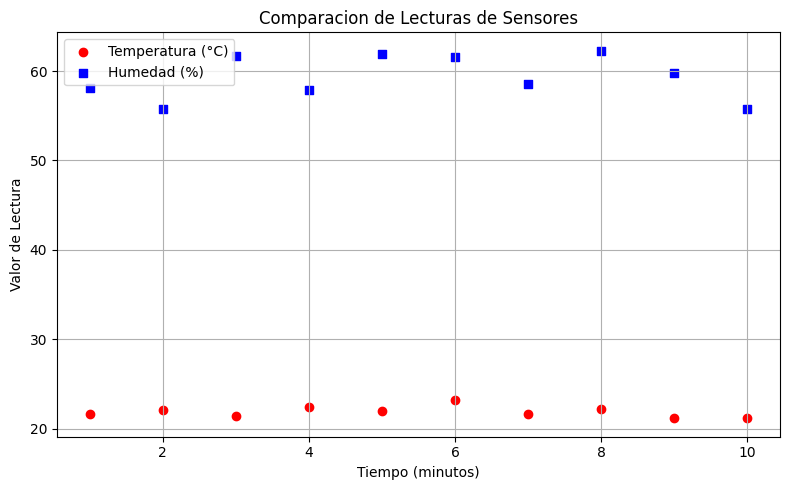

In [35]:
import matplotlib.pyplot as plt
import numpy as np

tiempo = np.arange(1, 11)
temperatura = [22 + np.random.uniform(-1,2) for _ in tiempo]
humedad = [60 + np.random.uniform(-5, 3) for _ in tiempo]

plt.figure(figsize=(8, 5))
plt.scatter(tiempo, temperatura, color='red', label='Temperatura (°C)', marker='o')
plt.scatter(tiempo, humedad, color='blue', label='Humedad (%)', marker='s')
plt.title('Comparacion de Lecturas de Sensores')
plt.xlabel('Tiempo (minutos)')
plt.ylabel('Valor de Lectura')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### **Ejercicio 5**: pandas y análisis de datos

**Crear DataFrame**
- Crea un DataFrame con columnas Producto, Precio, Stock.

In [16]:
import pandas as pd

datos = {
    "Producto":["A","B","C"],
    "Precio":[1000,2000,1500],
    "Stock":[10, 5, 8]
}
df = pd.DataFrame(datos)
df.head()

,Producto,Precio,Stock
0,A,1000,10
1,B,2000,5
2,C,1500,8


**Agregar columna calculada**
- Agrega una columna ValorTotal = Precio * Stock.

In [17]:
df["ValorTotal"] = df["Precio"] * df["Stock"]
df.head()

,Producto,Precio,Stock,ValorTotal
0,A,1000,10,10000
1,B,2000,5,10000
2,C,1500,8,12000


**Filtrar productos caros**
- Muestra solo los productos con precio mayor a $1000.

In [18]:
df_filtrado = df[df["Precio"] > 1000]
df_filtrado.head()

,Producto,Precio,Stock,ValorTotal
1,B,2000,5,10000
2,C,1500,8,12000


**Guardar DataFrame en CSV**
- Guarda el DataFrame en un archivo productos.csv.

In [19]:
df.to_csv("productos.csv", index=False)

**Leer CSV y mostrar resumen**
- Lee el archivo productos.csv y muestra las primeras 5 filas.

In [20]:
df_leido=pd.read_csv("productos.csv")
df_leido.head()

,Producto,Precio,Stock,ValorTotal
0,A,1000,10,10000
1,B,2000,5,10000
2,C,1500,8,12000


##### **Ejercicio 6**: Clases, objetos y lógica aplicada

**Clase Sensor**
- Crea una clase Sensor con atributos tipo, valor, unidad. Agrega un método leer() que imprima el valor con su unidad.

In [37]:
class Sensor:
    def __init__(self, tipo, valor, unidad):
        self.tipo = tipo
        self.valor = valor
        self.unidad = unidad

    def leer(self):
        print(f"Valor del sensor ({self.tipo}): {self.valor} {self.unidad}")

# Ejemplo de uso
sensor_temperatura = Sensor("Temperatura", 23.5, "°C")
sensor_temperatura.leer()

Valor del sensor (Temperatura): 23.5 °C


**Simulación de lectura**
- Crea una lista de sensores y simula lecturas con valores aleatorios usando random.

In [48]:
import random

class Sensor:
    def __init__(self, tipo, unidad):
        self.tipo = tipo
        self.unidad = unidad
        self.valor = 0.0

    def leer(self):
        print(f"{self.tipo.capitalize()} → {self.valor:.2f} {self.unidad}")

    def simular_lectura(self, rango_min, rango_max):
        self.valor = round(random.uniform(rango_min, rango_max), 2)

#Ejemplo de uso
sensores = [
    Sensor("temperatura", "°C"),
    Sensor("presión", "kPa"),
    Sensor("humedad", "%")
]

rangos = {
    "temperatura": (-10, 50),
    "presión": (90, 110),
    "humedad": (0, 100)
}

print("Lecturas simuladas:")
for sensor in sensores:
    rmin, rmax = rangos[sensor.tipo]
    sensor.simular_lectura(rmin, rmax)
    sensor.leer()

📡 Lecturas simuladas:
Temperatura → 5.98 °C
Presión → 91.50 kPa
Humedad → 53.44 %


**Clase con validación**
- Modifica la clase Sensor para validar que el valor esté dentro de un rango permitido.

In [49]:
class Sensor:
    def __init__(self, tipo, valor, unidad, rango_min=0, rango_max=100):
        self.tipo = tipo
        self.unidad = unidad
        self.rango_min = rango_min
        self.rango_max = rango_max
        self.valor = self.validar_valor(valor)

    def validar_valor(self, valor):
        if self.rango_min <= valor <= self.rango_max:
            return valor
        else:
            print(f"⚠️ Valor fuera de rango para '{self.tipo}': {valor}. Se ajusta al límite permitido.")
            return max(self.rango_min, min(valor, self.rango_max))

    def leer(self):
        print(f"{self.tipo.capitalize()} → {self.valor} {self.unidad}")

#Ejemplo de uso
s1 = Sensor("temperatura", 25, "°C", -10, 50)
s1.leer()

s2 = Sensor("presión", 150, "kPa", 90, 120)
s2.leer()


Temperatura → 25 °C
⚠️ Valor fuera de rango para 'presión': 150. Se ajusta al límite permitido.
Presión → 120 kPa


**Contador de instancias**
- Agrega una variable de clase que cuente cuántos sensores han sido creados.

In [51]:
class Sensor:
    # Variable de clase (compartida por todas las instancias)
    contador = 0

    def __init__(self, tipo, valor, unidad):
        self.tipo = tipo
        self.valor = valor
        self.unidad = unidad
        Sensor.contador += 1  # Incrementa al crear cada sensor

    def leer(self):
        print(f"{self.tipo.capitalize()} → {self.valor} {self.unidad}")

    @classmethod
    def total_sensores(cls):
        print(f"🔢 Sensores creados: {cls.contador}")


#Ejemplo de uso
s1 = Sensor("temperatura", 22.5, "°C")
s2 = Sensor("presión", 101.3, "kPa")
s3 = Sensor("humedad", 45.2, "%")

s1.leer()
s2.leer()
s3.leer()

Sensor.total_sensores()


Temperatura → 22.5 °C
Presión → 101.3 kPa
Humedad → 45.2 %
🔢 Sensores creados: 3


**Comparación entre objetos**
- Implementa un método comparar(sensor2) que indique cuál sensor tiene mayor valor.

In [52]:
class Sensor:
    def __init__(self, tipo, valor, unidad):
        self.tipo = tipo
        self.valor = valor
        self.unidad = unidad

    def leer(self):
        print(f"{self.tipo.capitalize()} → {self.valor} {self.unidad}")

    def comparar(self, otro_sensor):
        if self.valor > otro_sensor.valor:
            print(f"🔍 El sensor '{self.tipo}' tiene mayor valor ({self.valor} {self.unidad}) que '{otro_sensor.tipo}' ({otro_sensor.valor} {otro_sensor.unidad}).")
        elif self.valor < otro_sensor.valor:
            print(f"🔍 El sensor '{otro_sensor.tipo}' tiene mayor valor ({otro_sensor.valor} {otro_sensor.unidad}) que '{self.tipo}' ({self.valor} {self.unidad}).")
        else:
            print(f"🔍 Ambos sensores tienen el mismo valor: {self.valor} {self.unidad}.")

#Ejemplo de uso
s1 = Sensor("temperatura", 25.0, "°C")
s2 = Sensor("temperatura", 28.5, "°C")
s3 = Sensor("humedad", 25.0, "%")

s1.comparar(s2)
s1.comparar(s3)

🔍 El sensor 'temperatura' tiene mayor valor (28.5 °C) que 'temperatura' (25.0 °C).
🔍 Ambos sensores tienen el mismo valor: 25.0 °C.


##### **Ejercicio 7**: Comparación de ventas por categoría

Consigna: Crea una lista de categorías de productos y sus ventas totales.
- Representa los datos en un gráfico de barras.
- Usa colores personalizados y ordena las categorías por ventas.

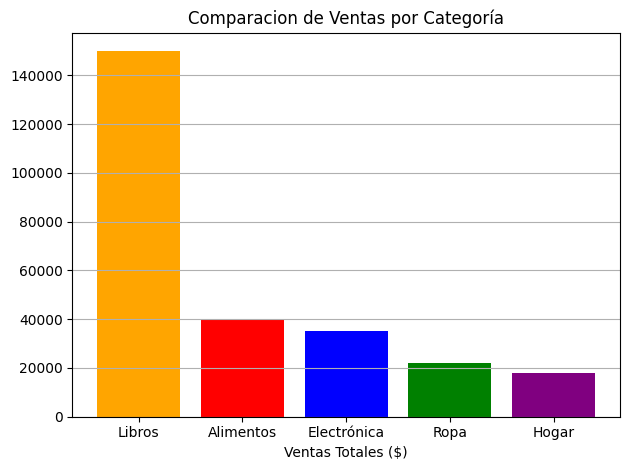

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

categorias = ['Electrónica','Ropa','Alimentos','Hogar','Libros']
ventas = [35000, 22000, 40000, 18000, 150000]
colores = ['blue', 'green', 'red', 'purple', 'orange']

df = pd.DataFrame({'Categoria': categorias, 'Ventas': ventas, 'Color': colores})
df_ordenado = df.sort_values(by='Ventas', ascending=False)

plt.Figure(figsize=(8, 5))
plt.bar(df_ordenado['Categoria'], df_ordenado['Ventas'], color=df_ordenado['Color'])
plt.title('Comparacion de Ventas por Categoría')
plt.xlabel('Ventas Totales ($)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

##### **Ejercicio 8**: Archivos y persistencia

**Guardar sensores en archivo**
- Crea una función que guarde los datos de sensores en un archivo .txt.


In [42]:
def guardar_sensores_txt(sensores, archivo):
    with open(archivo, 'w') as f:
        for sensor in sensores:
            f.write(str(sensor) + '\n')

**Leer sensores desde archivo**
- Crea una función que lea el archivo y reconstruya objetos Sensor.


In [27]:
def leer_sensores_txt(archivo):
    sensores = []
    try:
        with open(archivo, 'r') as f:
            for linea in f:
                linea = linea.strip()
                if ':' in linea and '[' in linea and ']' in linea:
                    tipo, resto = linea.split(':')
                    valor_str, unidad = resto.split('[')
                    valor = float(valor_str)
                    unidad = unidad.strip(']')
                    sensores.append(Sensor(tipo, valor, unidad))
    except FileNotFoundError:
        print('Archivo no encontrado.')
    return sensores

**Formato personalizado**
- Guarda los sensores en formato tipo:valor[unidad] y luego parsea ese formato al leer.


In [ ]:
import pandas as pd

# Clase Sensor
class Sensor:
    def __init__(self, tipo, valor, unidad):
        self.tipo = tipo
        self.valor = float(valor)
        self.unidad = unidad

    def __str__(self):
        return f"{self.tipo}:{self.valor}[{self.unidad}]"

    @staticmethod
    def from_string(linea):
        try:
            tipo, resto = linea.strip().split(":")
            valor, unidad = resto.strip("]").split("[")
            return Sensor(tipo, valor, unidad)
        except Exception as e:
            print(f"Error al parsear línea: {linea} → {e}")
            return None

**Exportar a CSV**
- Exporta los sensores a un archivo .csv usando pandas.

In [28]:
import pandas as pd

def exportar_sensores_csv(sensores, archivo_csv):
    datos = {
        "Tipo": [s.tipo for s in sensores],
        "Valor": [s.valor for s in sensores],
        "Unidad": [s.unidad for s in sensores]
    }
    df = pd.DataFrame(datos)
    df.to_csv(archivo_csv, index=False)

**Importar desde CSV y filtrar**
- Lee el archivo y muestra solo los sensores de tipo “temperatura”.

In [ ]:
def importar_y_filtrar_csv(archivo_csv, tipo_filtro="temperatura"):
    df = pd.read_csv(archivo_csv)
    filtrado = df[df["Tipo"] == tipo_filtro]
    print(filtrado)

##### **Ejercicio 9**: Comparación de sensores

Consigna: Simula lecturas de dos sensores (temperatura y humedad) durante 10 minutos.
- Crea un gráfico de dispersión que compare ambas variables.
- Agrega leyenda, colores distintos y cuadrícula.

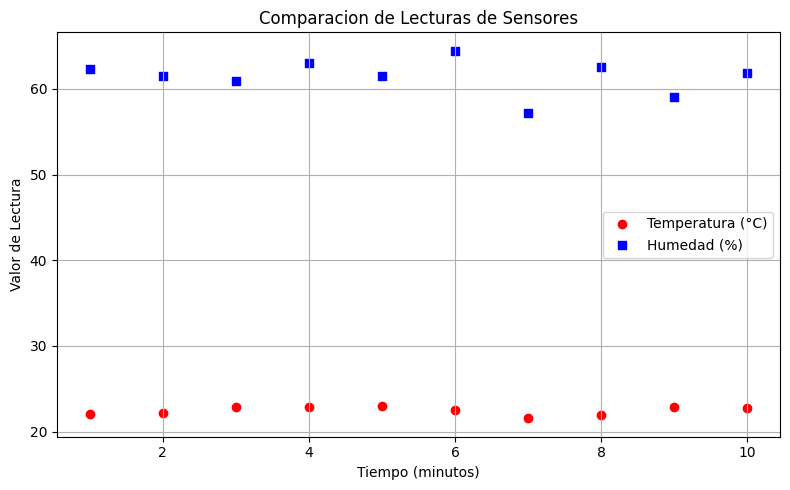

In [43]:
import matplotlib.pyplot as plt
import numpy as np

tiempo = np.arange(1, 11)
temperatura = [22 + np.random.uniform(-1, 1) for _ in tiempo]
humedad = [60 + np.random.uniform(-5, 5) for _ in tiempo]

plt.figure(figsize=(8, 5))
plt.scatter(tiempo, temperatura, color='red', label='Temperatura (°C)', marker='o')
plt.scatter(tiempo, humedad, color='blue', label='Humedad (%)', marker='s')
plt.title('Comparacion de Lecturas de Sensores')
plt.xlabel('Tiempo (minutos)')
plt.ylabel('Valor de Lectura')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### **Ejercicio 10**: Evolución de visitas a un sitio web

Consigna: Simula el número de visitas diarias a un sitio web durante 15 días.
- Crea un gráfico de líneas que muestre la evolución.
- Agrega marcadores, título y etiquetas.

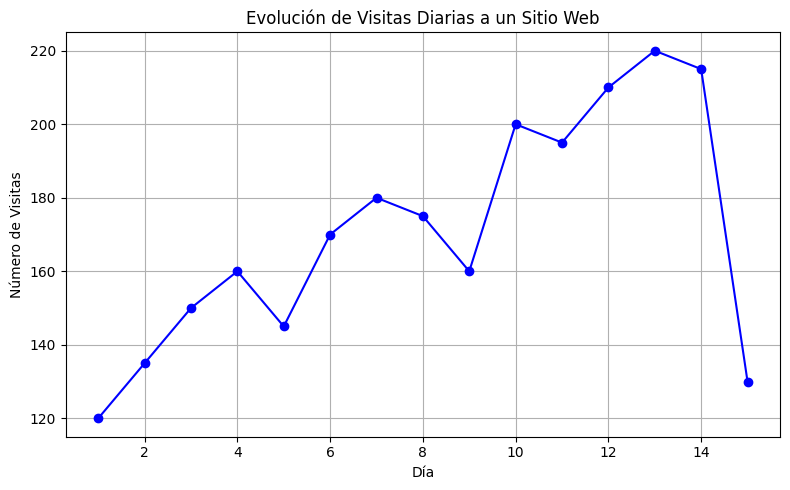

In [44]:
import matplotlib.pyplot as plt

dias = list(range(1, 16))
visitas = [120, 135, 150, 160, 145, 170, 180, 175, 160, 200, 195, 210, 220, 215, 130]

plt.figure(figsize=(8, 5))
plt.plot(dias, visitas, marker='o', linestyle='-', color='blue')
plt.title('Evolución de Visitas Diarias a un Sitio Web')
plt.xlabel('Día')
plt.ylabel('Número de Visitas')
plt.grid(True)
plt.tight_layout()
plt.show()

##### **Ejercicio 11**: Distribución de tiempo en actividades diarias

Consigna: Simula el tiempo dedicado a actividades como estudio, trabajo, ocio, sueño y transporte.
- Representa los datos en un gráfico circular.
- Usa autopct para mostrar porcentajes.

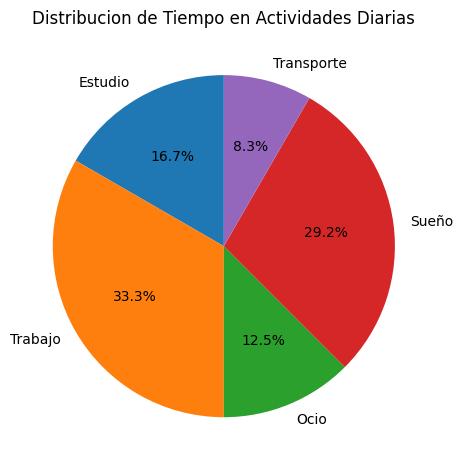

In [45]:
import matplotlib.pyplot as plt

actividades = ['Estudio', 'Trabajo', 'Ocio', 'Sueño', 'Transporte']
tiempo = [4, 8, 3, 7, 2]

plt.Figure(figsize=(6, 6))
plt.pie(tiempo, labels=actividades, autopct='%1.1f%%', startangle=90)
plt.title('Distribucion de Tiempo en Actividades Diarias')
plt.tight_layout()
plt.show()

##### **Ejercicio 12**: Comparación de rendimiento académico

Consigna: Simula el promedio de notas de 5 asignaturas en un curso.
- Representa los datos en un gráfico de barras vertical.
- Usa colores distintos para cada barra.

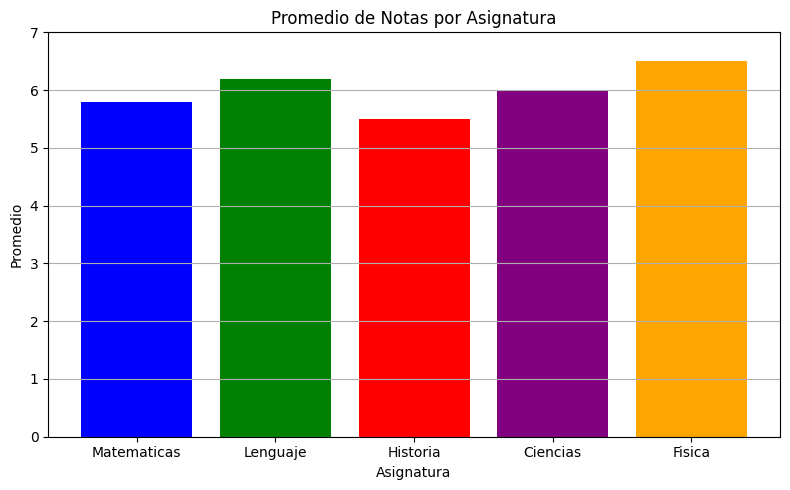

In [46]:
import matplotlib.pyplot as plt

asignaturas = ['Matematicas', 'Lenguaje', 'Historia', 'Ciencias', 'Fisica']
promedios = [5.8, 6.2, 5.5, 6.0, 6.5]
colores = ['blue', 'green', 'red', 'purple', 'orange']

plt.figure(figsize=(8, 5))
plt.bar(asignaturas, promedios, color=colores)
plt.title('Promedio de Notas por Asignatura')
plt.xlabel('Asignatura')
plt.ylabel('Promedio')
plt.ylim(0, 7)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

***
- Nombre: Carlos Duran
- Seccion: 1, 2, 3
- Fecha: 30/10/2025 - 14/11/2025 - 06/11/2025
- Integral Dividida: $\int_{a}^{b} f(x)\, dx$
- [Indicadores Economicos](https://si3.bcentral.cl/Indicadoressiete/secure/Indicadoresdiarios.aspx)
- ![Imagen](https://www.udalba.cl/wp-content/uploads/2025/03/logo-horizontal-100px-universidad-del-alba.png)